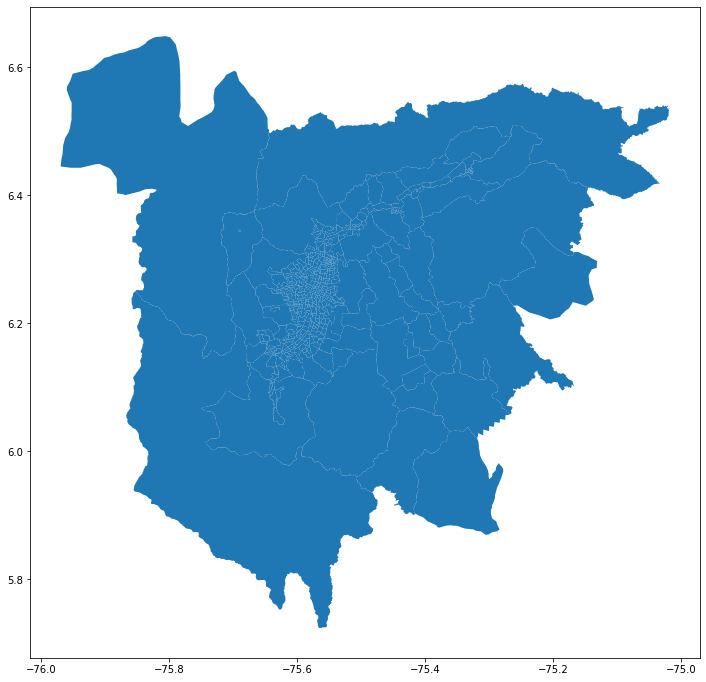

In [2]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from shapely.ops import cascaded_union
from shapely.geometry import Polygon
%matplotlib inline

aburra_valley = gp.read_file("maps/EOD.shp")
# Plotting
aburra_valley.plot(figsize=(12, 12))
plt.show()

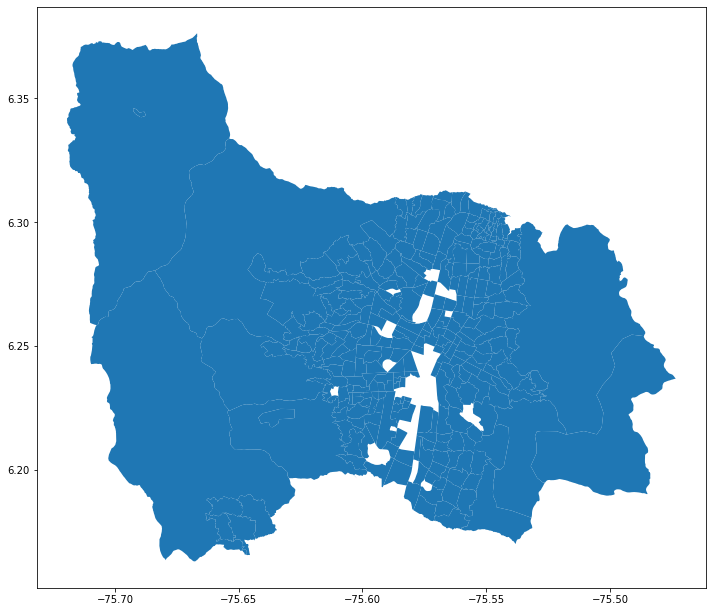

In [3]:
# Extraer Medellin
ids = list(pd.read_csv('eod.csv').to_numpy().transpose()[0, :])
erased = []
for index, row in aburra_valley.iterrows():
    if int(row['SIT_2017']) not in ids:
        erased.append(index)

medellin = aburra_valley.drop(erased, axis=0)
medellin.plot(figsize=(12, 12))
plt.show()

medellin.to_file('maps/medellin.shp', driver='ESRI Shapefile')

In [5]:
# Create cascaded union
polygons = []
for index, row in medellin.iterrows():
    polygons.append(row['geometry'])
    
medellin_merged = gp.GeoSeries(cascaded_union(polygons))

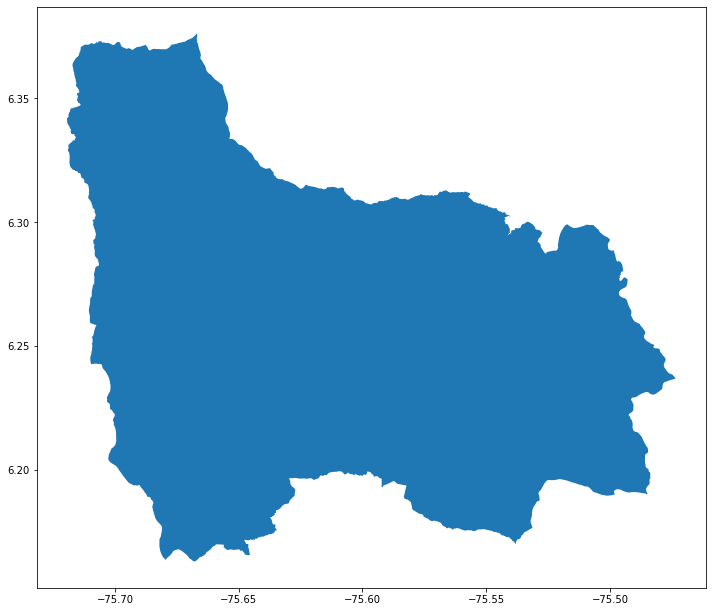

In [9]:
# Use cascaded union
g = [i for i in medellin_merged.geometry]
x, y = g[0].exterior.coords.xy
coord = np.dstack((x, y)).tolist()

plotting = False
if plotting:
    for i in range(len(coord[0]) - 1):
        plt.plot((coord[0][i][0], coord[0][i + 1][0]), (coord[0][i][1], coord[0][i + 1][1]), 'k')

    plt.show()

outer_medellin = gp.GeoSeries(Polygon(coord[0]))
outer_medellin.plot(figsize=(12, 12))
plt.show()

outer_medellin.to_file('maps/medellin_merged.shp', driver='ESRI Shapefile')